In [5]:
import pandas as pd
import altair as alt

In [6]:
data = {
    "procurement_routes": [
        {"key": "Direct Procurement", "cpv_histogram": [
            {"key": 0, "doc_count": 56344}, {"key": 10000000, "doc_count": 61026},
            {"key": 20000000, "doc_count": 22798}, {"key": 30000000, "doc_count": 408915},
            {"key": 40000000, "doc_count": 295593}, {"key": 50000000, "doc_count": 87426},
            {"key": 60000000, "doc_count": 90188}, {"key": 70000000, "doc_count": 325144},
            {"key": 80000000, "doc_count": 61264}, {"key": 90000000, "doc_count": 118533}
        ]},
        {"key": "Joint Procurement", "cpv_histogram": [
            {"key": 0, "doc_count": 5267}, {"key": 10000000, "doc_count": 2777},
            {"key": 20000000, "doc_count": 923}, {"key": 30000000, "doc_count": 13904},
            {"key": 40000000, "doc_count": 6462}, {"key": 50000000, "doc_count": 2901},
            {"key": 60000000, "doc_count": 5165}, {"key": 70000000, "doc_count": 8457},
            {"key": 80000000, "doc_count": 1182}, {"key": 90000000, "doc_count": 2944}
        ]},
        # Add the rest of the procurement routes in a similar fashion...
    ]
}

In [7]:
records = []
for route in data["procurement_routes"]:
    route_name = route["key"]
    for bucket in route["cpv_histogram"]:
        records.append({
            "procurement_route": route_name,
            "cpv_bin": bucket["key"],
            "doc_count": bucket["doc_count"]
        })

# Create a DataFrame
df = pd.DataFrame(records)

# Create the Altair plot
chart = alt.Chart(df).transform_density(
    density='cpv_bin',
    groupby=['procurement_route'],
    as_=['cpv_bin', 'density']
).mark_area().encode(
    alt.X("cpv_bin:Q", bin=alt.Bin(step=10000000), title="CPV Histogram"),
    alt.Y("density:Q", title="Density"),
    alt.Row("procurement_route:N", title="Procurement Route")
).properties(
    width=400,
    height=100
)

chart

alt.Chart(...)

In [11]:
import json
json.loads(chart.to_json())


{'$schema': 'https://vega.github.io/schema/vega-lite/v5.20.1.json',
 'config': {'view': {'continuousHeight': 300, 'continuousWidth': 300}},
 'data': {'name': 'data-cc5e703b9eed67bfbebac43962d603dc'},
 'datasets': {'data-cc5e703b9eed67bfbebac43962d603dc': [{'cpv_bin': 0,
    'doc_count': 56344,
    'procurement_route': 'Direct Procurement'},
   {'cpv_bin': 10000000,
    'doc_count': 61026,
    'procurement_route': 'Direct Procurement'},
   {'cpv_bin': 20000000,
    'doc_count': 22798,
    'procurement_route': 'Direct Procurement'},
   {'cpv_bin': 30000000,
    'doc_count': 408915,
    'procurement_route': 'Direct Procurement'},
   {'cpv_bin': 40000000,
    'doc_count': 295593,
    'procurement_route': 'Direct Procurement'},
   {'cpv_bin': 50000000,
    'doc_count': 87426,
    'procurement_route': 'Direct Procurement'},
   {'cpv_bin': 60000000,
    'doc_count': 90188,
    'procurement_route': 'Direct Procurement'},
   {'cpv_bin': 70000000,
    'doc_count': 325144,
    'procurement_route'

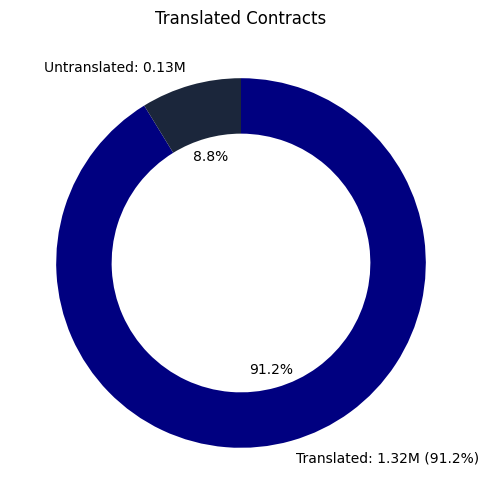

In [17]:
import matplotlib.pyplot as plt

# Data
total_contracts = 1.447  # in millions
translated_contracts = 1.32  # in millions
untranslated_contracts = total_contracts - translated_contracts

# Percentage of translated contracts
translated_percentage = (translated_contracts / total_contracts) * 100

# Donut plot with navy and dark blue colors
sizes = [translated_contracts, untranslated_contracts]
labels = [
    f'Translated: {translated_contracts:.2f}M ({translated_percentage:.1f}%)',
    f'Untranslated: {untranslated_contracts:.2f}M'
]
colors = ['navy', '#1B263B']  # Navy and dark blue

plt.figure(figsize=(6, 6))
plt.pie(
    sizes, 
    labels=labels, 
    colors=colors, 
    startangle=90, 
    counterclock=False, 
    wedgeprops=dict(width=0.3),
    autopct=lambda p: f'{p:.1f}%' if p > 0 else ''  # Show percentages within slices
)
plt.title("Translated Contracts")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\mnt\\data\\cleaned_data_table.png'

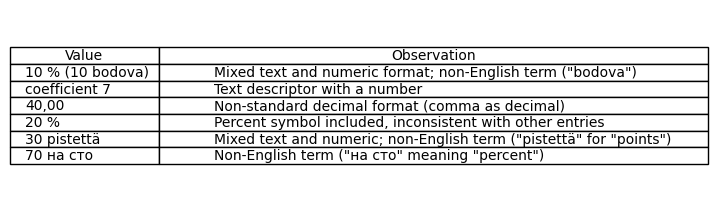

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the table
data = {
    "Value": [
        "10 % (10 bodova)", 
        "coefficient 7", 
        "40,00", 
        "20 %", 
        "30 pistettä", 
        "70 на сто"
    ],
    "Observation": [
        'Mixed text and numeric format; non-English term ("bodova")',
        'Text descriptor with a number',
        'Non-standard decimal format (comma as decimal)',
        'Percent symbol included, inconsistent with other entries',
        'Mixed text and numeric; non-English term ("pistettä" for "points")',
        'Non-English term ("на сто" meaning "percent")'
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 2.5))

# Hide axes and display table
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='left', loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0, 1])  # Adjust column width

# Save the table as a PNG image
plt.savefig("/mnt/data/cleaned_data_table.png", dpi=150, bbox_inches="tight", transparent=True)

plt.show()
